In [17]:
#1
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Generating the dataset using Binomial Distribution
np.random.seed(42)
n = 100  # Total products
p = 0.1  # Probability of a product being defective
data = np.random.binomial(1, p, n)
outcome_map = {1: 'Defective', 0: 'Non-Defective'}
data = [outcome_map[i] for i in data]

df = pd.DataFrame(data, columns=['Quality Check Outcome'])

# Display the first few rows of the dataframe
df.head()

,Quality Check Outcome
0,Non-Defective
1,Defective
2,Non-Defective
3,Non-Defective
4,Non-Defective



Interpretation: Based on the dataset, provide a brief interpretation of the distribution of defective products.
Ans: the distribution is centered around this probability. This means that, on average, you would expect around 10% of the products to be defective.
Visualization: Plot a bar chart to visualize the number of defective and non-defective products.


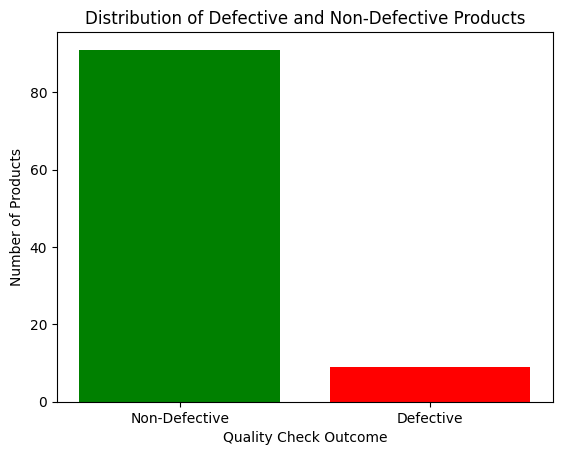

In [18]:
# Count the occurrences of each category
outcome_counts = df['Quality Check Outcome'].value_counts()

# Plotting the bar chart
plt.bar(outcome_counts.index, outcome_counts.values, color=['green', 'red'])
plt.xlabel('Quality Check Outcome')
plt.ylabel('Number of Products')
plt.title('Distribution of Defective and Non-Defective Products')
plt.show()


Binomial Distribution Application:

Assume that the probability of a product being defective is p. Using the sample proportion of defective products from the dataset, estimate the value of p.
Calculate the probability that out of the next 50 products, more than 10 will be defective using the estimated value of p.

In [19]:
# Convert labels to numerical values
numeric_data = np.array([1 if outcome == 'Defective' else 0 for outcome in data])

# Calculate the estimated value of p
estimated_p = np.mean(numeric_data)
print(f"Estimated probability of a product being defective: {estimated_p:.2f}")



Estimated probability of a product being defective: 0.09


In [20]:
# Number of trials (next 50 products)
next_n = 50

# Calculate the probability using the estimated value of p
prob_more_than_10_defective = 1 - binom.cdf(10, next_n, estimated_p)
print(f"Probability of more than 10 defective products out of the next 50: {prob_more_than_10_defective:.4f}")


Probability of more than 10 defective products out of the next 50: 0.0043


In [21]:
#2

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Generating the dataset using Poisson Distribution
np.random.seed(42)
lambda_value = 5  # Average number of customers arriving per hour
hours = list(range(1, 25))
data = np.random.poisson(lambda_value, 24)

df = pd.DataFrame({'Hour': hours, 'Number of Customers': data})

# Display the first few rows of the dataframe
df.head()

,Hour,Number of Customers
0,1,5
1,2,4
2,3,4
3,4,5
4,5,5



Interpretation: Based on the dataset, provide a brief interpretation of the distribution of customer arrivals per hour.
Ans: the distribution is centered around this average rate. Poisson distribution is commonly used to model the number of events occurring in a fixed interval of time or space, given the average rate.
Visualization: Plot a histogram to visualize the distribution of customer arrivals in different hours.


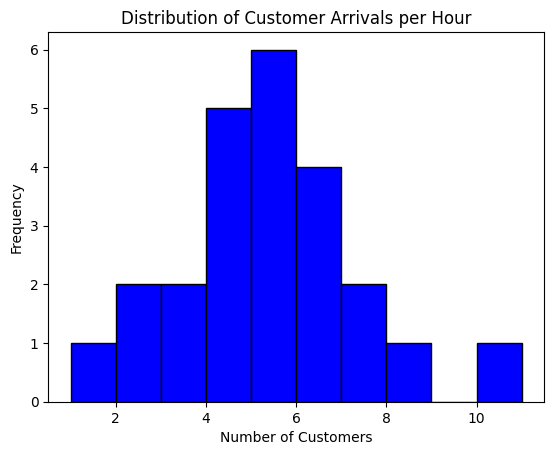

In [22]:
# Plotting the histogram
plt.hist(df['Number of Customers'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Arrivals per Hour')
plt.show()


Poisson Distribution Application:

Estimate the average rate (λ) of customer arrivals per hour using the dataset.
Calculate the probability that in a given hour, more than 10 customers will arrive using the estimated value of λ.

In [23]:
# Calculate the estimated value of λ
estimated_lambda = np.mean(df['Number of Customers'])
print(f"Estimated average rate of customer arrivals per hour (λ): {estimated_lambda:.2f}")


Estimated average rate of customer arrivals per hour (λ): 4.92


In [24]:
# Calculate the probability using the estimated value of λ
prob_more_than_10_customers = 1 - poisson.cdf(10, estimated_lambda)
print(f"Probability of more than 10 customers arriving in a given hour: {prob_more_than_10_customers:.4f}")


Probability of more than 10 customers arriving in a given hour: 0.0122


In [25]:
#3

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Generating the dataset using Exponential Distribution
np.random.seed(42)
lambda_value = 2  # Average number of requests per minute
data = np.random.exponential(1/lambda_value, 1000)

df = pd.DataFrame(data, columns=['Time Between Requests (minutes)'])

# Display the first few rows of the dataframe
df.head()

,Time Between Requests (minutes)
0,0.234634
1,1.505061
2,0.658373
3,0.456471
4,0.084812



Interpretation: Based on the dataset, provide a brief interpretation of the distribution of time intervals between consecutive server requests.
Ans: the distribution of time intervals between consecutive server requests follows an exponential pattern. The Exponential distribution is commonly used to model the time between events in a Poisson process, such as the arrival of requests.

Visualization: Plot a histogram to visualize the distribution of time intervals between requests.



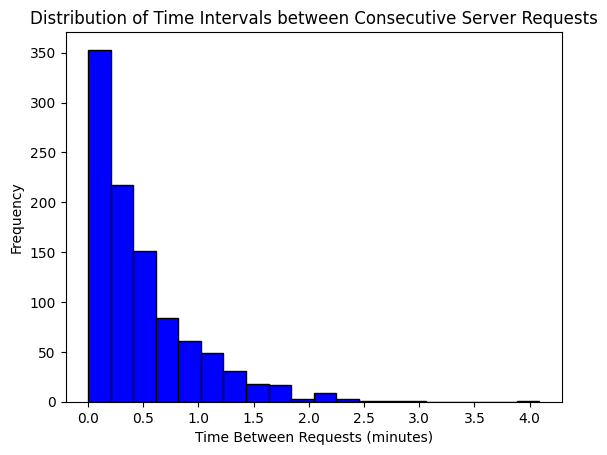

In [26]:
# Plotting the histogram
plt.hist(df['Time Between Requests (minutes)'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Time Between Requests (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Intervals between Consecutive Server Requests')
plt.show()


Exponential Distribution Application:

Estimate the rate parameter (λ) of the Exponential Distribution using the inverse of the sample mean of the dataset.
Calculate the probability that the time between two consecutive requests will exceed 2 minutes using the estimated value of λ.
Determine the time by which 90% of the requests would have already arrived post a previous request.

In [27]:
# Calculate the estimated value of λ using the inverse of the sample mean
estimated_lambda = 1 / np.mean(df['Time Between Requests (minutes)'])
print(f"Estimated rate parameter (λ) of the Exponential Distribution: {estimated_lambda:.4f}")

# Calculate the probability using the estimated value of λ
prob_exceed_2_minutes = 1 - expon.cdf(2, scale=1/estimated_lambda)
print(f"Probability that the time between two consecutive requests will exceed 2 minutes: {prob_exceed_2_minutes:.4f}")

# Determine the time using the quantile function (inverse of the cumulative distribution function)
time_for_90_percent = expon.ppf(0.9, scale=1/estimated_lambda)
print(f"Time by which 90% of the requests would have already arrived post a previous request: {time_for_90_percent:.2f} minutes")


Estimated rate parameter (λ) of the Exponential Distribution: 2.0565
Probability that the time between two consecutive requests will exceed 2 minutes: 0.0164
Time by which 90% of the requests would have already arrived post a previous request: 1.12 minutes
